**Визуализируем количество фильмов на разных стриминговых сервисах по годам**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("MoviesOnStreamingPlatforms.csv")

data

Unnamed: 0    ID                                     Title  Year  Age  \
0              0     1                              The Irishman  2019  18+   
1              1     2                                    Dangal  2016   7+   
2              2     3  David Attenborough: A Life on Our Planet  2020   7+   
3              3     4         Lagaan: Once Upon a Time in India  2001   7+   
4              4     5                                      Roma  2018  18+   
...          ...   ...                                       ...   ...  ...   
9510        9510  9511                        Most Wanted Sharks  2020  NaN   
9511        9511  9512             Doc McStuffins: The Doc Is In  2020  NaN   
9512        9512  9513                     Ultimate Viking Sword  2019  NaN   
9513        9513  9514           Hunt for the Abominable Snowman  2011  NaN   
9514        9514  9515       Women of Impact: Changing the World  2019   7+   

     Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  
0             98/100        1     0            0        0     0  
1             97/100        1     0            0        0     0  
2             95/100        1     0            0        0     0  
3             94/100        1     0            0        0     0  
4             94/100        1     0            0        0     0  
...              ...      ...   ...          ...      ...   ...  
9510          14/100        0     0            0        1     0  
9511          13/100        0     0            0        1     0  
9512          13/100        0     0            0        1     0  
9513          10/100        0     0            0        1     0  
9514          10/100        0     0            0        1     0  

[9515 rows x 11 columns]

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
# Очистим данные, заменим NAN на  None
data = data.where(pd.notnull(data), None)

In [6]:
# Групируем данные по году и по платформе
grouped_data = data.groupby(['Year', 'Type']).agg({
    "Netflix": 'sum',
    "Hulu": 'sum',
    "Prime Video": 'sum',
    "Disney+": 'sum'
}).reset_index()

In [7]:
grouped_data

Year  Type  Netflix  Hulu  Prime Video  Disney+
0    1914     0        0     0            1        0
1    1915     0        0     0            2        0
2    1916     0        0     0            1        0
3    1919     0        0     0            1        0
4    1920     0        0     0            2        0
..    ...   ...      ...   ...          ...      ...
98   2017     0      449    91          285       28
99   2018     0      540   108          285       34
100  2019     0      573   156          256       50
101  2020     0      478   116          204       71
102  2021     0      201    37           63       28

[103 rows x 6 columns]

In [8]:
# Создадим сводную таблицу с количеством фильмов для каждой стриминговой платформы и года
pivot_table = pd.pivot_table(grouped_data , values=['Netflix', 'Hulu', 'Prime Video', 'Disney+'],
                            index="Year", columns='Type', aggfunc='sum', fill_value=0)

In [9]:
pivot_table

Disney+ Hulu Netflix Prime Video
Type       0    0       0           0
Year                                 
1914       0    0       0           1
1915       0    0       0           2
1916       0    0       0           1
1919       0    0       0           1
1920       0    0       0           2
...      ...  ...     ...         ...
2017      28   91     449         285
2018      34  108     540         285
2019      50  156     573         256
2020      71  116     478         204
2021      28   37     201          63

[103 rows x 4 columns]

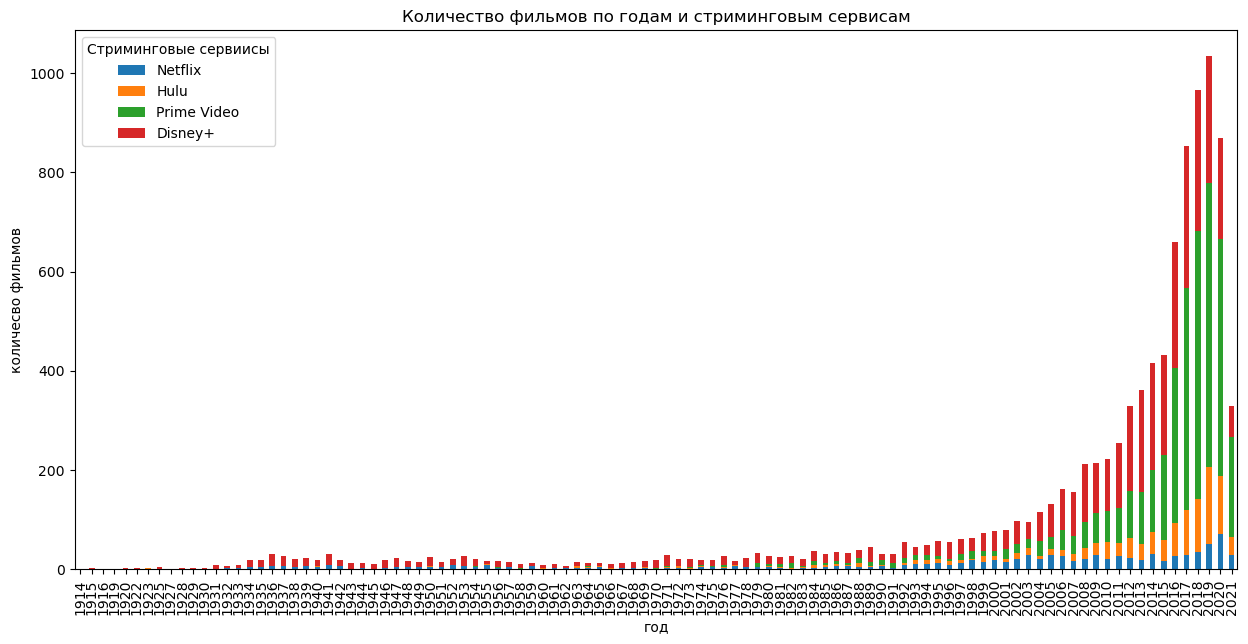

In [10]:
# Создание диаграммы
pivot_table.plot(kind='bar', stacked=True, figsize=(15, 7))

plt.title("Количество фильмов по годам и стриминговым сервисам")
plt.xlabel("год")
plt.ylabel("количесво фильмов")
plt.legend(['Netflix', 'Hulu', 'Prime Video', 'Disney+'], title="Стриминговые сервиисы")

plt.show()

In [2]:
%pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 859.6 kB/s eta 0:00:000:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pymysql

In [8]:
connection = pymysql.connect(
    host="127.0.0.1",
    port=3306,
    user='root',
    password="root",
    database="testdb"
)

if connection.open:
    print("Подключение к базе данных успешно.")
else:
    print("Не удалось подключиться к базе данных")


# Закрытие подключение к БД.
connection.close()

Подключение к базе данных успешно.


In [10]:
connection = pymysql.connect(
    host="127.0.0.1",
    port=3306,
    user='root',
    password="root",
    database="movies"
)

if connection.open:
    print("Подключение к базе данных успешно.")
else:
    print("Не удалось подключиться к базе данных")


# Закрытие подключение к БД.
# connection.close()

Подключение к базе данных успешно.


In [13]:
# Загружаем данные из файла CSV c помощью pandas
data = pd.read_csv('MoviesOnStreamingPlatforms.csv')


# Очистка данных, замена значений Nan на None
data = data.where(pd.notnull(data), None)

In [16]:
# Создадим список кортежей для множественной вставки
values = []
for index, row in data.iterrows():
    values.append((
        row["ID"], row["Title"], row['Year'], row["Age"], row["Rotten Tomatoes"],
        row['Netflix'], row['Hulu'], row['Prime Video'], row['Disney+'], row['Type']
    ))

In [14]:
# Создаем таблицу для данных из csv
with connection.cursor() as coursor:
    coursor.execute("""
        CREATE TABLE IF NOT EXISTS movies (
            id INT PRIMARY KEY,
            title VARCHAR(255),
            year INT,
            age VARCHAR(10),
            rotten_tomatoes VARCHAR(10),
            netflix BOOLEAN,
            hulu BOOLEAN,
            prime_video BOOLEAN,
            disney_plus BOOLEAN,
            type VARCHAR(255)
        )
    """)
    connection.commit()

In [17]:
# Добавляем данные множественным INSERT
with connection.cursor() as coursor:
    query = """
        INSERT IGNORE INTO movies
            (id, title, year, age, rotten_tomatoes, netflix, hulu, prime_video, disney_plus, type) 
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """
    coursor.executemany(query, values)
    connection.commit()

In [18]:
# Запрос данныз из таблицы `movies` БД MySQL и создаем DataFrame
query = """
    SELECT year, type, netflix, hulu, prime_video, disney_plus
    FROM movies
    WHERE type IS NOT NULL
"""

data_from_db = pd.read_sql(query, connection)

data_from_db

/tmp/ipykernel_159/226419322.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_from_db = pd.read_sql(query, connection)


year type  netflix  hulu  prime_video  disney_plus
0     2019    0        1     0            0            0
1     2016    0        1     0            0            0
2     2020    0        1     0            0            0
3     2001    0        1     0            0            0
4     2018    0        1     0            0            0
...    ...  ...      ...   ...          ...          ...
9510  2020    0        0     0            0            1
9511  2020    0        0     0            0            1
9512  2019    0        0     0            0            1
9513  2011    0        0     0            0            1
9514  2019    0        0     0            0            1

[9515 rows x 6 columns]

In [19]:
connection.close()